In [363]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn.cluster import KMeans
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

# Inicializando Base

A base foi inicializada a partir do link do repósitorio hospedado no github que este relatório se encontra.

In [364]:
dataset = pd.read_csv("https://raw.githubusercontent.com/arthuruan/Unsupervised-Kmeans-Hierarchical/master/wine.csv", sep = ',')

## Pré-processamento

Sabe-se que, é de grande importância em aprendizagem de máquina, o tratamento correto da base que o algoritmo irá ser treinado. A partir disso, o pré-processamento da base escolhida é um passo indispensável para se obter bons resultados, então é o que vamos fazer agora 😀.

### Verificando Correlação

Primeiro iremos verificar a correlação dos atributos. A partir da tabela gerada é perceptível que os atributos **Total_phenols** e **Flavanoids** possuem uma correlação alta. Não obstante, foi preferível a não exclusão de nenhum desses atributos para uma análise mais completa dos dados.

In [365]:
corr = dataset.corr()
corr.style.background_gradient()

,Unnamed: 0,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
Unnamed: 0,1.000000,-0.362844,0.487630,-0.016086,0.563955,-0.232275,-0.650084,-0.758609,0.482817,-0.406681,0.255444,-0.662205,-0.697445,-0.644330
Alcohol,-0.362844,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic_acid,0.487630,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.016086,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity_of_ash,0.563955,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.232275,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total_phenols,-0.650084,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.758609,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid_phenols,0.482817,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.406681,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


### Descartando colunas

Neste passo de pré-processamento, a partir de uma análise na base de dados, foi percebido que a primeira coluna, na qual possui os Ids das instâncias, não ajudaria na aprendizagem do algoritmo, dessa forma a coluna foi descartada. Também foi feito uma formatação da base para um array numpy, assim mais a frente vamos conseguir plotar os dados da base sem a normalização.

In [366]:
dataset = dataset.drop(['Unnamed: 0'], axis=1)
# formatando tabela para array numpy, com isso será possivel a plotagem do valor
# não normalizado
dataset_not_transformed = np.array(dataset)

dataset.head()

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Verificando outliers

Um outlier é um valor que foge da normalidade e que pode causar anomalias nos resultados obtidos por meio do algoritmo. Dessa forma, foi analisado a ocorrência de outliers nos atributos da base e foi percebido que o atributo Magnesium é o que mais ocorre outliers.

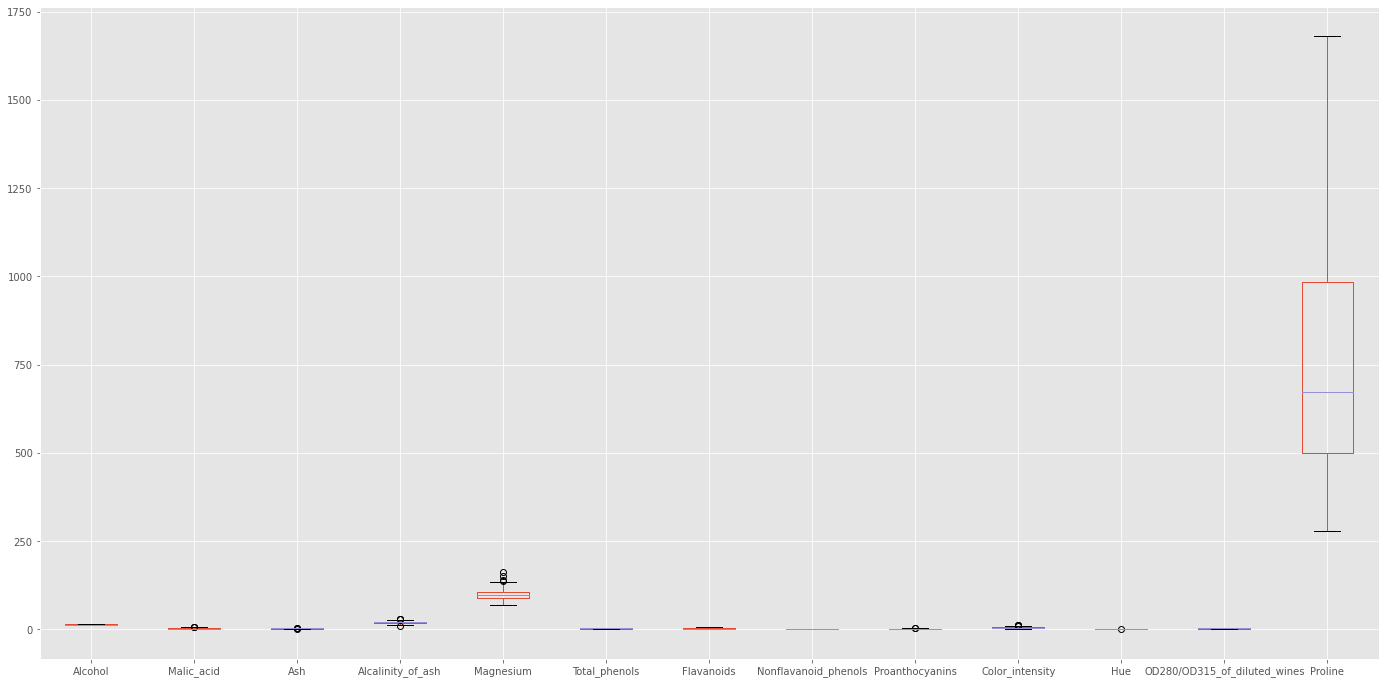

In [367]:
dataset.boxplot(figsize=(24,12))

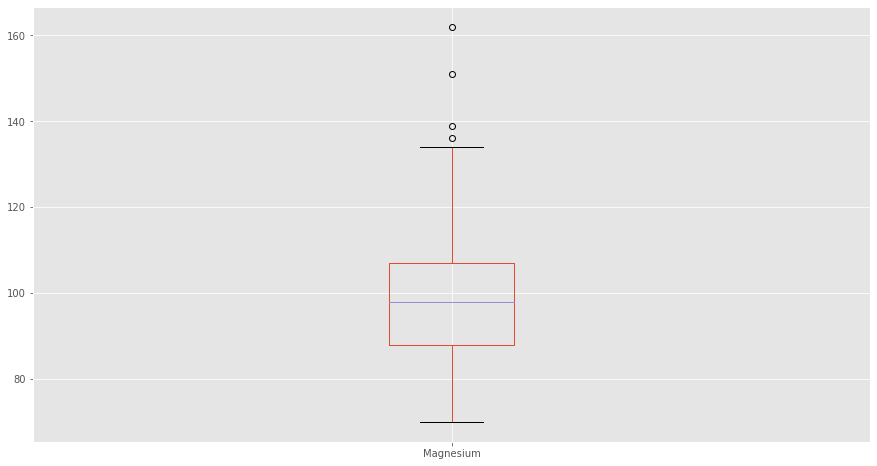

In [368]:
dataset.boxplot(figsize=(15, 8), column='Magnesium')

### Verificando valores nulos

Agora iremos avaliar se a base usada apresenta intâncias nulas. Ao observar os dados, percebemos que todos atributos possuem valores de instâncias 🥳.

In [369]:
nullValues = pd.isnull(dataset).sum()

nullValues

Alcohol                         0
Malic_acid                      0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
OD280/OD315_of_diluted_wines    0
Proline                         0
dtype: int64

### Normalizando a base

Para normalizar a base foi usado a função Standard Scaler, pois ela padroniza os recursos removendo a média e escalonando para a variação da unidade. O principal motivo para o uso dessa normalização foi porque a padronização de um conjunto de dados é um requisito comum para muitos estimadores de aprendizado de máquina.

In [370]:
# Aplicando normalização dos dados
ss = StandardScaler()
ss.fit(dataset)
dataset_transformed = ss.transform(dataset)

# Kmeans

O primeiro algoritmo de aprendizagem não supervisionado escolhido foi o kmeans, que avalia e clusteriza os dados de acordo com suas características. De acordo com a métrica ultilizada (silhueta) para analisar o modelo, que será explicado posteriormente, foi escolhido o número de 3 clusters para o treinamento do algoritmo.

In [371]:
kmeans = KMeans(n_clusters=3, random_state=10)

Definimos uma função para fazer a plotagem dos dados

In [372]:
def plot_clustering(data, labels, title=None):
    x_min, x_max = np.min(data, axis=0), np.max(data, axis=0)
    data = (data - x_min) / (x_max - x_min)
    fig = plt.figure(1, figsize=(4, 3))
    plt.figure(figsize=(10, 7))
    
    plt.scatter(data[:, 0], data[:, 1],
                 c=labels.astype(np.float), cmap='rainbow')

    if title is not None:
        plt.title(title, size=17)
        
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

## Kmeans com base normalizada

Primeiro iremos analisar a clusterização dos dados com a base normalizada. É perceptível o agrupamento dos dados em três setores do gráfico, porém ainda assim os dados estão muito espalhados e que mesmo com a troca da função de normalização não foi obtido um resultado melhor do que o apresentado.

<Figure size 288x216 with 0 Axes>

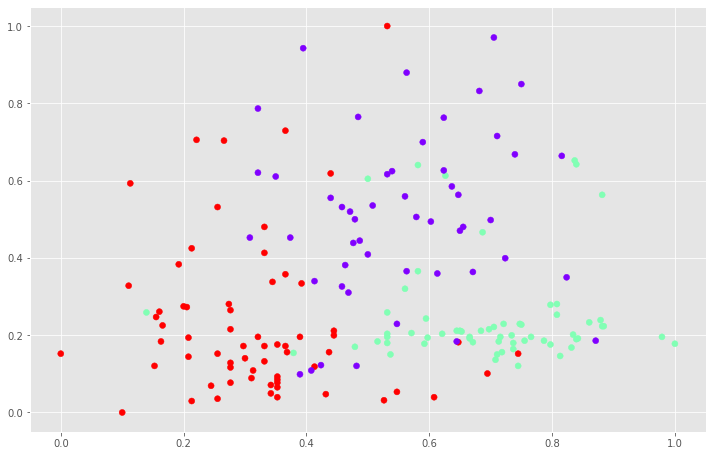

In [373]:
kmeans.fit(dataset_transformed)
labels = kmeans.labels_

plot_clustering(dataset_transformed, labels)

plt.show()

## Kmeans com base não normalizada

Ao analisar a clusterização dos dados na base não normalizada em comparação com a base normalizada é perceptível que os dados estão bem mais espalhados. Tendo em vista que dois clusters estão bem misturados, uma das melhorias a se fazer na análise dos dados não normalizados seria escolher o número de clusters 2, outra melhoria em questão seria um melhor pré-processamento, tratando melhor os outliers e atributos que possuem uma alta correlação (como foi citado a cima que os atributos **Total_phenols** e **Flavanoids** não foram tratados justamente para uma melhor análise).

<Figure size 288x216 with 0 Axes>

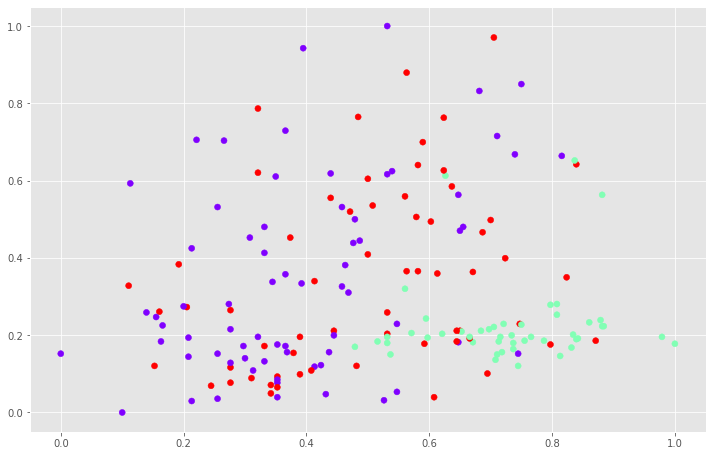

In [374]:
kmeans.fit(dataset_not_transformed)
labels = kmeans.labels_

plot_clustering(dataset_not_transformed, labels)

plt.show()

## Silhueta

Métrica usada para representação gráfica sucinta de quão bem cada objeto foi classificado, é bastante útil para saber quantos clusters usar na aprendizagem não supervionada e foi com essa métrica que foi escolhido o número de clusters já supracitado.

Tabela de análise de valores da Silhueta:

s(i)        | Descrição 
:---------: | :------: 
0,71 - 1,00 | Uma estrutura forte foi encontrada
0,51 - 0,70 | Uma estrutura razoável foi encontrada
0,26 - 0,50 | A estrutura é fraca e pode ser superfical.
<= 0,25 | Nenhuma estrutura substancial foi encontrada

Fonte: https://www.maxwell.vrac.puc-rio.br/7975/7975_3.PDF, página 11

### Base normalizado

Ao analisar diferentes números de clusters percebemos que o número 3 é o que possui um score de silhueta melhor, mesmo não sendo um valor indicado, segundo a tabela de valores da Silhueta.

In [375]:
exmp_clusters = [2, 3, 4]

for n_clusters in exmp_clusters:
  clusterer = KMeans(n_clusters=n_clusters, random_state=10)
  cluster_labels = clusterer.fit_predict(dataset_transformed)

  silhouette_avg = silhouette_score(dataset_transformed, cluster_labels)

  print("Número de cluster: ", n_clusters, 
        "-- valor da Silhueta: ", silhouette_avg)


Número de cluster:  2 -- valor da Silhueta:  0.25931695553182543
Número de cluster:  3 -- valor da Silhueta:  0.2848589191898987
Número de cluster:  4 -- valor da Silhueta:  0.25987462789190524


### Base não normalizado

Análogo ao que foi analisado a cima é perceptível que o número de 2 clusters na base não normalizada obteu um melhor resultado, tendo uma estrutura razoável. Após uma breve observação é plausível dizer que a normalização dos dados não resultou em um resultado de Silhueta melhor, porém é válido reforçar que a base não obteu resultados esperados no agrupamento de dados.

In [376]:
for n_clusters in exmp_clusters:
  clusterer = KMeans(n_clusters=n_clusters, random_state=10)
  cluster_labels = clusterer.fit_predict(dataset_not_transformed)

  silhouette_avg = silhouette_score(dataset_not_transformed, cluster_labels)

  print("Número de cluster: ", n_clusters, 
        "-- valor da Silhueta: ", silhouette_avg)

Número de cluster:  2 -- valor da Silhueta:  0.6568536504294317
Número de cluster:  3 -- valor da Silhueta:  0.571138193786884
Número de cluster:  4 -- valor da Silhueta:  0.562091530895106


# Hierárquico

O modelo hirárquico é um algoritmo que constrói a hierarquia de clusters e é divido em 2 subcategorias:
* Aglomerativos:
 * Produzem uma sequência de agrupamentos com um número
decrescente de clusters a cada passo.
 * Os agrupamentos produzidos em cada passo resultam da fusão de
dois clusters em um.
* Divisivos:
 * Atuam na direção oposta, isto é, eles produzem uma sequência de
agrupamentos com um número crescente de clusters a cada
passo.
 * Os agrupamentos produzidos em cada passo resultam da partição
de um único cluster em dois.

A subcategoria escolhida foi a aglomerativa.

### Dendrograma

O dendrograma é um diagrama de árvore que exibe os grupos formados por agrupamento de observações em cada passo e em seus níveis de similaridade. Nele é possível analizar o número de clusters que deverá ser usada no algoritmo, assim como, a distância dos clusters, na base normalizada é possível observar que temos 3 agrupamentos, tendo com isso 3 clusters mesmo eles não tendo uma distância considerável entre si.

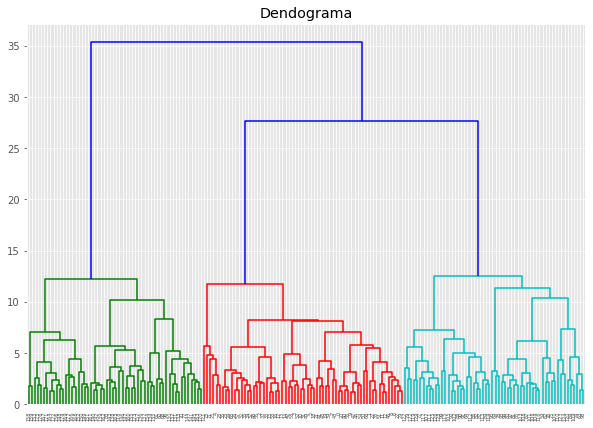

In [377]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Dendograma")
dend = shc.dendrogram(shc.linkage(dataset_transformed, method='ward'))

Aqui estamos clusterizando um modelo aglomerativo com a métrica euclidiana.

In [378]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

## Base normalizada

Obtemos resultados bem parecidos com o algoritmo passado, tendo dados muito espalhados e classes pouco separadas.

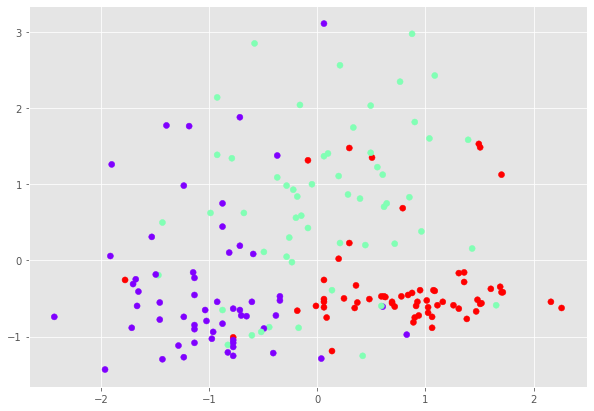

In [390]:
silhouette_avg = silhouette_score(dataset_transformed, cluster_labels)

plt.figure(figsize=(10, 7))
plt.scatter(dataset_transformed[:,0], dataset_transformed[:,1], c=cluster.labels_, cmap='rainbow')

silhouette_avg

## Base não normalizada

Assim como no Kmeans com a base não normalizada obtivemos classes misturadas, tendo um resultado melhor com um número de clusters 2.

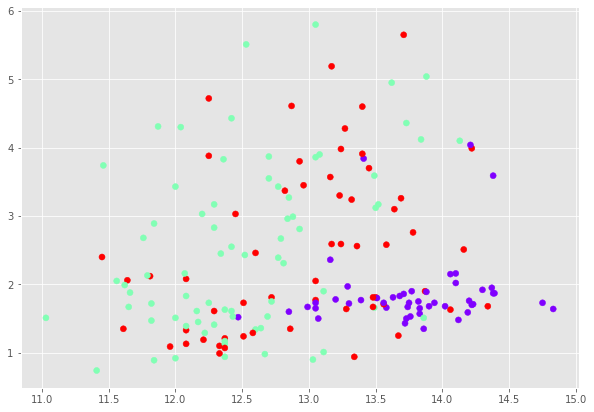

In [389]:
cluster_labels2 = cluster.fit_predict(dataset_not_transformed)

silhouette_avg = silhouette_score(dataset_not_transformed, cluster_labels2)

plt.figure(figsize=(10, 7))
plt.scatter(dataset_not_transformed[:,0], dataset_not_transformed[:,1], c=cluster.labels_, cmap='rainbow')

silhouette_avg

## Silhueta

Análogo ao tópico anterior tivemos resultados bem parecidos com os resultados encontrados no algoritmo de Kmeans.

### Base normalizada

In [391]:
silhouette_avg = silhouette_score(dataset_transformed, cluster_labels)
silhouette_avg

0.2774439826952265

### Base não normalizada


In [385]:
cluster_labels = cluster.fit_predict(dataset_not_transformed)

silhouette_avg = silhouette_score(dataset_not_transformed, cluster_labels)

silhouette_avg

0.5644796401732071